<a href="https://colab.research.google.com/github/psoonsawad/energybeacondataset/blob/master/updated_code_of_MDP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

'''==================================================
Initial set up
=================================================='''

#Hyperparameters
SMALL_ENOUGH = 0.005
GAMMA = 0.9         
NOISE = 0.5  
MAX_ITER = 20

#Define all states
degrees = [0, 30, 60, 90]
all_states = []
for i in range(24):
  for degree in degrees:
    all_states.append((i, degree))

# Define rewards for all states
#rewards = { # (time, degree) : power
#     (0, 0) : 0,  (0, 30) : 0,   (0, 60) : 0,  (0, 90) : 0,  
#     (1, 0) : 0,  (1, 30) : 0,   (1, 60) : 0,  (1, 90) : 0, 
#     (2, 0) : 0,  (2, 30) : 0,   (2, 60) : 0,  (2, 90) : 0, 
#     (3, 0) : 0,  (3, 30) : 0,   (3, 60) : 0,  (3, 90) : 0, 
#     (4, 0) : 0,  (4, 30) : 0,   (4, 60) : 0,  (4, 90) : 0, 
#     (5, 0) : 0,  (5, 30) : 0,   (5, 60) : 0,  (5, 90) : 0, 
#     (6, 0) : 0,  (6, 30) : 0,   (6, 60) : 0,  (6, 90) : 0, 
#     (7, 0) : 19.65,  (7, 30) : 61.23,   (7, 60) : 86.41,  (7, 90) : 88.44, 
#     (8, 0) : 39.68,  (8, 30) : 72.66,   (8, 60) : 86.17,  (8, 90) : 76.59, 
#    (9, 0) : 56.24,  (9, 30) : 78.47,   (9, 60) : 79.68,  (9, 90) : 59.54, 
#    (10, 0) : 68.17,  (10, 30) : 78.25,  (10, 60) : 67.35,  (10, 90) : 38.41, 
#  (11, 0) : 74.64,  (11, 30) : 71.98,  (11, 60) : 50.03,  (11, 90) : 14.68, 
#    (12, 0) : 75.22,  (12, 30) : 60.11,  (12, 60) : 28.89,  (12, 90) : 0, 
#    (13, 0) : 69.85,  (13, 30) : 43.43,  (13, 60) : 5.38,  (13, 90) : 0, 
#    (14, 0) : 58.91,  (14, 30) : 23.08,  (14, 60) : 0,  (14, 90) : 0, 
#    (15, 0) : 43.15,  (15, 30) : 0.47,  (15, 60) : 0,  (15, 90) : 0, 
#    (16, 0) : 23.67,  (16, 30) : 0,  (16, 60) : 0,  (16, 90) : 0, 
#    (17, 0) : 2.23,  (17, 30) : 0,  (17, 60) : 0,  (17, 90) : 0, 
#    (18, 0) : 0,  (18, 30) : 0,  (18, 60) : 0,  (18, 90) : 0, 
#    (19, 0) : 0,  (19, 30) : 0,  (19, 60) : 0,  (19, 90) : 0, 
#    (20, 0) : 0,  (20, 30) : 0,  (20, 60) : 0,  (20, 90) : 0, 
#    (21, 0) : 0,  (21, 30) : 0,  (21, 60) : 0,  (21, 90) : 0, 
#    (22, 0) : 0,  (22, 30) : 0,  (22, 60) : 0,  (22, 90) : 0,
#    (23, 0) : 0,  (23, 30) : 0,  (23, 60) : 0,  (23, 90) : 0
#}

rewards = { # time, degree) : power
    (0, 0) : 0,  (0, 30) : 0,   (0, 60) : 0,  (0, 90) : 0,  
    (1, 0) : 0,  (1, 30) : 0,   (1, 60) : 0,  (1, 90) : 0, 
    (2, 0) : 0,  (2, 30) : 0,   (2, 60) : 0,  (2, 90) : 0, 
    (3, 0) : 0,  (3, 30) : 0,   (3, 60) : 0,  (3, 90) : 0, 
    (4, 0) : 0,  (4, 30) : 0,   (4, 60) : 0,  (4, 90) : 0, 
    (5, 0) : 0,  (5, 30) : 0,   (5, 60) : 0,  (5, 90) : 0, 
    (6, 0) : 0,  (6, 30) : 0,   (6, 60) : 0,  (6, 90) : 0, 
    (7, 0) : 0,  (7, 30) : 0,   (7, 60) : 0,  (7, 90) : 0, 
    (8, 0) : 0,  (8, 30) : 0,   (8, 60) : 0,  (8, 90) : 0, 
    (9, 0) : 0,  (9, 30) : 0,   (9, 60) : 0,  (9, 90) : 0,         
    (10, 0) : 217.14,  (10, 30) : 305.52,  (10, 60) : 371.91,  (10, 90) : 278.72, 
    (11, 0) : 618.18,  (11, 30) : 739.2,  (11, 60) : 830.28,  (11, 90) : 758.88, 
    (12, 0) : 728.96,  (12, 30) : 990,  (12, 60) : 1112,  (12, 90) : 918.5, 
    (13, 0) : 807.58,  (13, 30) : 937.08,  (13, 60) : 958.74,  (13, 90) : 812.05, 
    (14, 0) : 690.48,  (14, 30) : 654,  (14, 60) : 746.64,  (14, 90) : 621.3, 
    (15, 0) : 668.56,  (15, 30) : 704,  (15, 60) : 685,  (15, 90) : 548.43, 
    (16, 0) : 235.52,  (16, 30) : 271.89,  (16, 60) : 274.01,  (16, 90) : 198.12, 
    (17, 0) : 158.72,  (17, 30) : 180,  (17, 60) : 186.85,  (17, 90) : 133.92, 
    (18, 0) : 96.4,  (18, 30) : 116.88,  (18, 60) : 106.7,  (18, 90) : 70.2, 
    (19, 0) : 96.2,  (19, 30) : 116.64,  (19, 60) : 106.7,  (19, 90) : 65.66, 
    (20, 0) : 96.2,  (20, 30) : 116.64,  (20, 60) : 106.7,  (20, 90) : 65.66, 
    (21, 0) : 0,  (21, 30) : 0,  (21, 60) : 0,  (21, 90) : 0, 
    (22, 0) : 0,  (22, 30) : 0,  (22, 60) : 0,  (22, 90) : 0,
    (23, 0) : 0,  (23, 30) : 0,  (23, 60) : 0,  (23, 90) : 0
}

#Dictionnary of possible actions. We have two "end" states (1,2 and 2,2)
actions = {}
for i in range(24):
  for degree in degrees:
    if degree == 0:
      actions[(i, degree)] = ["0", "30"]
      # actions[(i, degree)] = ["0", "30", "60", "90"]
    elif degree == 30:
      actions[(i, degree)] = ["0", "30", "60"]
      # actions[(i, degree)] = ["0", "30", "60", "90"]
    elif degree == 60:
      actions[(i, degree)] = ["30", "60", "90"]
      # actions[(i, degree)] = ["0", "30", "60", "90"]
    else:
      actions[(i, degree)] = ["60", "90"]
      # actions[(i, degree)] = ["0", "30", "60", "90"]

#Define an initial policy
policy={}
for s in actions.keys():
  policy[s] = np.random.choice(actions[s])

#Define initial value function 
V={}
for s in all_states:
  V[s] = 0
        
'''==================================================
Value Iteration
=================================================='''

iteration = 0
while iteration <= MAX_ITER:
  biggest_change = 0
  for s in all_states:            
    if s in policy:
      old_v = V[s] # old reward
      new_v = 0 # new reward
      for a in actions[s]:
        if s[0] == 23:
          continue
        random_1 = np.random.choice(actions[s]) # randomly select the next action because the current action may be updated
        current = (s[0], int(a)) # current state
        next = (s[0]+1, int(random_1)) # next state
        v = rewards[s] + (GAMMA * ((1-NOISE)* V[current] + (NOISE * V[next]))) # calculate the new reward
        if v >= new_v: # check if the calculated reward is better
          new_v = v # if it is better, then save it
          policy[s] = a  # if it is better, then assign it to our policy
  #Save the best of all actions for the state                                
      V[s] = new_v # save best new reward
      biggest_change = max(biggest_change, np.abs(old_v - V[s])) # check how much is improved

  #See if the loop should stop now
  if biggest_change < SMALL_ENOUGH: # if the change is small, then we just stop it, because we dont find any improvement
    break
  iteration += 1
  
for s in all_states:
  print(str(s) + ":" + str(V[s])) # print the scores for each state

# Print final decision
final_decision = [] # initialize the final decision
for i in range(24): # loop all the time
  options = {} # initialize an array to store all the scores for all the degree
  for degree in degrees: # loop all the degrees , 0, 30, 60, 90
    options[degree] = V[(i, degree)] # store all the scores for each degree
  final_decision.append(max(options, key=options.get))
print("Final Decision: " + str(final_decision))

(0, 0):609.997592564323
(0, 30):629.7941571616019
(0, 60):633.085639027755
(0, 90):642.5426631912137
(1, 0):799.403896123605
(1, 30):813.6212281209628
(1, 60):823.5464462454555
(1, 90):828.0127944014773
(2, 0):1029.493417876651
(2, 30):1031.5818520113019
(2, 60):1040.3661468443881
(2, 90):1044.3190795192768
(3, 0):1284.7365367377533
(3, 30):1286.9942372474086
(3, 60):1293.6312938536757
(3, 90):1296.617969326496
(4, 0):1585.4237581088298
(4, 30):1591.259430153846
(4, 60):1596.2378770418268
(4, 90):1597.7481246859177
(5, 0):1955.383496324584
(5, 30):1959.307193260175
(5, 60):1961.0728568811908
(5, 90):1961.8674055106478
(6, 0):2401.212503840358
(6, 30):2408.4723611920595
(6, 60):2409.524539832696
(6, 90):2412.212777388612
(7, 0):2943.94484008537
(7, 30):2962.1664477178656
(7, 60):2967.214614727007
(7, 90):2972.0441273727083
(8, 0):3607.4387143853496
(8, 30):3628.992470535053
(8, 60):3624.053285230957
(8, 90):3624.053285230957
(9, 0):4395.353697961174
(9, 30):4438.673172961172
(9, 60):444

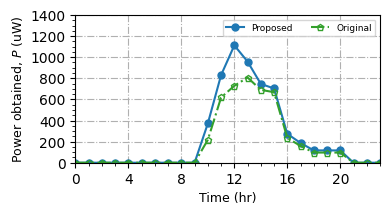

No handles with labels found to put in legend.


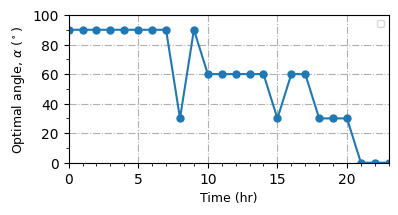

In [24]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator

x = range(0, 24) # time
y_proposed = [0.00, 0, 0, 0, 0, 0, 0.00, 0, 0, 0, 371.91, 830.28, 1112, 958.74, 746.64, 704, 274.01, 186.85, 116.88, 116.64, 116.64, 0, 0, 0 ] # the power from the excel with the given time (position of the item) and the MDP suggested degree (the simulated result)
y_original = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 217.14, 618.18, 728.96, 807.58, 690.48, 668.56, 235.52, 158.72, 96.4, 96.2, 96.2, 0, 0, 0 ] # the power from the excel when degree = 0 all the time
labels = ['Proposed', 'Original']
color = ["#1F78B4", "#33A02C"]
marker = ['o', 'p']
fig = plt.figure(num=None, figsize=(4,2.2), dpi=100)
plt.plot(x, np.array(y_proposed), label=labels[0], color=color[0], marker=marker[0], markersize=5, ls="-", fillstyle=None)
plt.plot(x, np.array(y_original), label=labels[1], color=color[1], ls="-.", fillstyle='none', marker=marker[1], markersize=5)
plt.legend(ncol=2, fontsize=6.5)
plt.xlabel('Time (hr)', fontsize=9)
plt.ylabel('Power obtained, $P$ (uW)', fontsize=9)
plt.tight_layout()

axes = fig.gca()
plt.grid(True, linestyle='-.')
plt.xlim(xmin=0, xmax=23)
plt.ylim(ymin=0, ymax=1400)
axes.xaxis.set_major_locator(MultipleLocator(4))
axes.xaxis.set_minor_locator(MultipleLocator(1))
axes.yaxis.set_major_locator(MultipleLocator(200))
axes.yaxis.set_minor_locator(MultipleLocator(50))
file_name = 'performance_evaluation.pdf'
plt.savefig(file_name)
plt.show()

x = range(0, 24) # time
y = [90, 90, 90, 90, 90, 90, 90, 90, 30, 90, 60, 60, 60, 60, 60, 30, 60, 60, 30, 30, 30, 0, 0, 0] # the power from the excel with the given time (position of the item) and the MDP suggested degree (the simulated result)
#y_original = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 217.14, 618.18, 728.96, 807.58, 690.48, 668.56, 235.52, 158.72, 96.4, 96.2, 96.2, 0, 0, 0 ] # the power from the excel when degree = 0 all the time
#labels = ['Optimal Angle']
color = ["#1F78B4"]
marker = ['o']
fig = plt.figure(num=None, figsize=(4,2.2), dpi=100)
plt.plot(x, np.array(y), color=color[0], marker=marker[0], markersize=5, ls="-", fillstyle=None)
#plt.plot(x, np.array(y_original), label=labels[1], color=color[1], ls="-.", fillstyle='none', marker=marker[1], markersize=5)
plt.legend(ncol=2, fontsize=6.5)
plt.xlabel('Time (hr)', fontsize=9)
plt.ylabel('Optimal angle, $\u03B1$ ($^\circ$)', fontsize=9)
plt.tight_layout()

axes = fig.gca()
plt.grid(True, linestyle='-.')
plt.xlim(xmin=0, xmax=23)
plt.ylim(ymin=0, ymax=100)
axes.xaxis.set_major_locator(MultipleLocator(5))
axes.xaxis.set_minor_locator(MultipleLocator(1))
axes.yaxis.set_major_locator(MultipleLocator(20))
axes.yaxis.set_minor_locator(MultipleLocator(10))
file_name = 'performance_evaluation1.pdf'
plt.savefig(file_name)
plt.show()

